In [ ]:
# 下载MNIST数据集
import os
import struct
import numpy as np
import gzip
import urllib.request
import shutil

# 数据集文件夹
data_folder = 'data'
# 数据集文件名
mnist_file = 'mnist.pkl.gz'
# 数据集下载地址
mnist_url = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'

# 创建数据集文件夹
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# 下载数据集
if not os.path.exists(os.path.join(data_folder, mnist_file)):
    print('Downloading MNIST dataset...')
    with urllib.request.urlopen(mnist_url) as response, open(os.path.join(data_folder, mnist_file), 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
    print('Download complete.')

In [ ]:

import pickle
import matplotlib.pyplot as plt
import numpy as np
with open("data/mnist.pkl/mnist.pkl", 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

train_x, train_y = train_set
data_example = np.reshape(np.array(train_x[0], dtype=float), [28, 28])
plt.figure()
plt.imshow(data_example, cmap='gray')

In [ ]:
!python knn.py

In [ ]:
! python knnscikit.py

数据集大小： 200


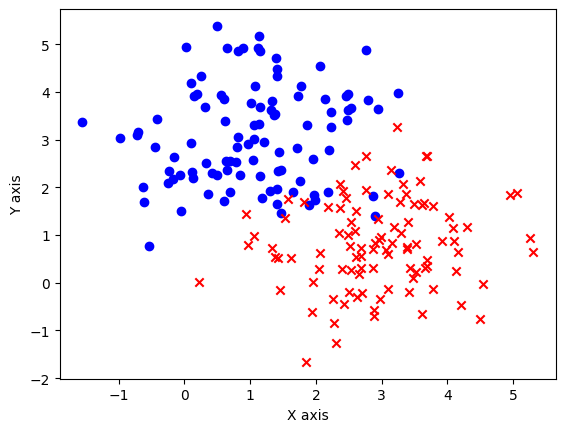

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
# 读入高斯数据集
data = np.loadtxt('data/gauss.csv', delimiter=',')
x_train = data[:, :2]
y_train = data[:, 2]
print('数据集大小：', len(x_train))

# 可视化
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [21]:
! python knnscikit.py

数据集大小： 200
Figure(1600x450)


![](D:\VSCode\code\python\ML\KNN\result\knn.png)

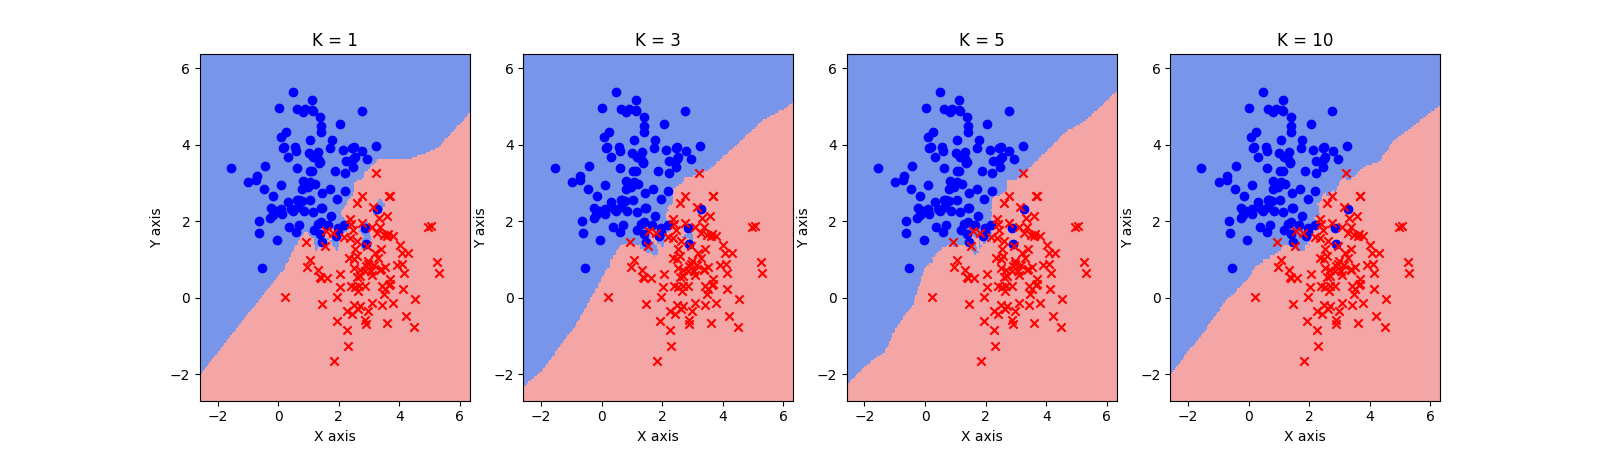

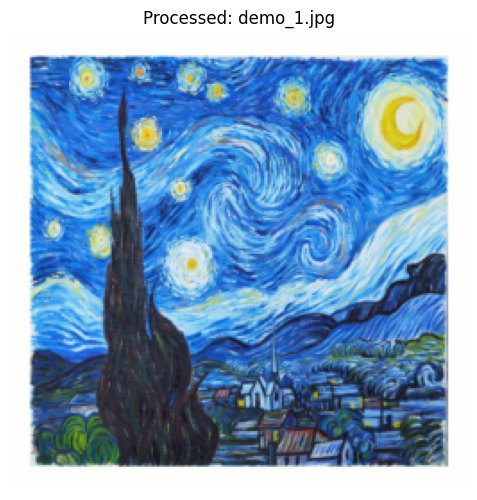

In [8]:
import os
import numpy as np
from skimage import io, transform
from PIL import Image
import matplotlib.pyplot as plt

# 指定文件夹路径
data_dir = "data/image/vangogh"

# 创建展示画布
fig = plt.figure(figsize=(16, 5))

# 遍历目录中的jpg文件
for i, file in enumerate([f for f in os.listdir(data_dir) if f.lower().endswith('.jpg')][:3]):
    # 构建完整文件路径
    img_path = os.path.join(data_dir, file)
    
    # 检查文件是否存在
    if not os.path.exists(img_path):
        print(f"文件不存在: {img_path}")
        continue
    
    try:
        # 读取图片
        img = io.imread(img_path)
        
        # 如果图片是灰度图，转换为RGB格式
        if len(img.shape) == 2:  # 灰度图只有2个维度
            img = np.stack([img] * 3, axis=-1)  # 转换为3通道
        elif img.shape[2] == 4:  # 如果图片是RGBA格式，去除Alpha通道
            img = img[:, :, :3]
        
        # 调整图片尺寸为256x256，保持原始数值范围并转换为uint8格式
        img_resized = transform.resize(img, (256, 256), 
                                       preserve_range=True,  # 保持原始数值范围
                                       anti_aliasing=True    # 启用抗锯齿
                                      ).astype(np.uint8)
        
        # 覆盖原图
        io.imsave(img_path, img_resized)
        
        # 在画布中展示清洗后的图片
        ax = fig.add_subplot(1, 3, i+1)
        ax.imshow(img_resized)
        ax.set_title(f"Processed: {file}")
        ax.axis('off')  # 隐藏坐标轴
    except Exception as e:
        print(f"处理文件 {file} 时出错: {e}")

# 调整布局并显示
plt.tight_layout()
plt.show()

reading demo_1.jpg


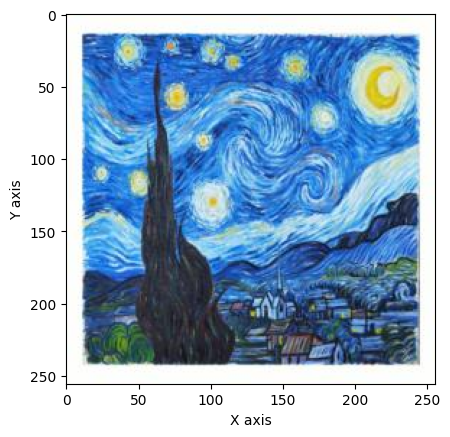

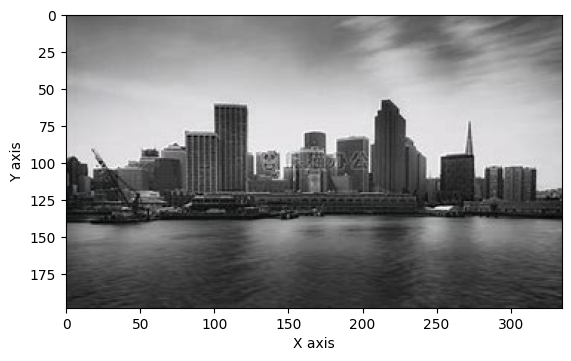

Constructing window...
Predicting...


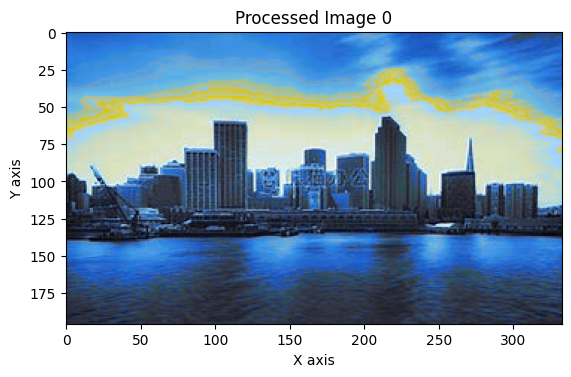

reading demo_1.jpg


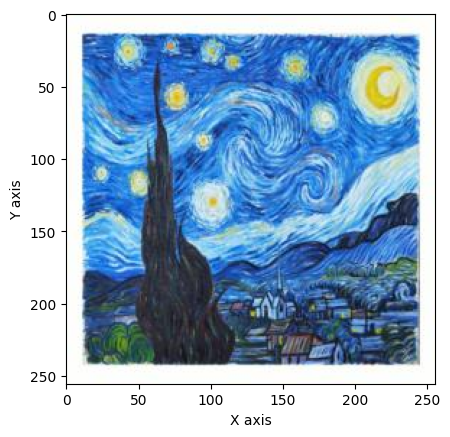

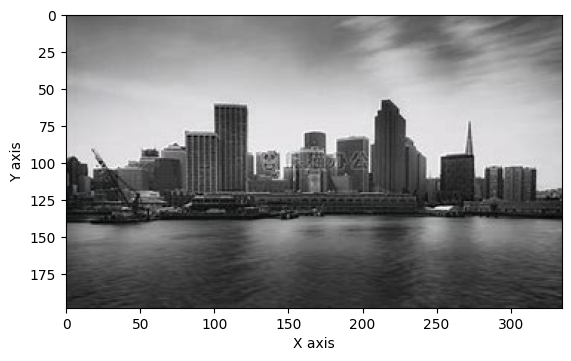

Constructing window...
Predicting...


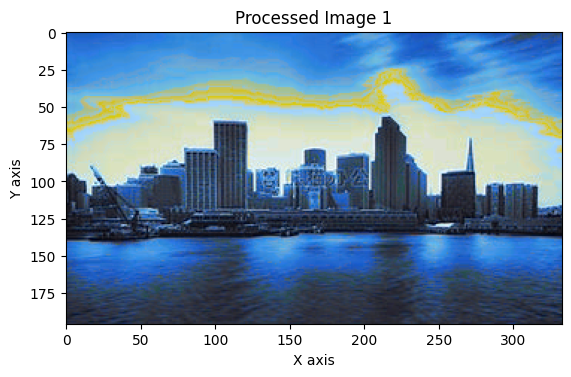

In [10]:
import knnregression
knnregression.procession_image()